In [1]:
"""
Explore correlations
Using the Canadian Disaster Database (CDD.csv, can be found on the share directory), you will explore the correlations 
between the numerical columns in the dataset. 
More info on the dataset can be found at https://www.kaggle.com/criticalhits/canadian-disaster-database#CDD.csv

"""

'\nExplore correlations\nUsing the Canadian Disaster Database (CDD.csv, can be found on the share directory), you will explore the correlations \nbetween the numerical columns in the dataset. \nMore info on the dataset can be found at https://www.kaggle.com/criticalhits/canadian-disaster-database#CDD.csv\n\n'

In [2]:
# import the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read the dataset

data = pd.read_csv('CDD.csv', sep='\t')
data.head()

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,...,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(1089, 22)

In [6]:
# checking for missing values

null_cols = data.isnull().sum()
null_cols[null_cols > 0]

FATALITIES                          89
INJURED / INFECTED                 115
EVACUATED                           70
ESTIMATED TOTAL COST               531
NORMALIZED TOTAL COST              531
FEDERAL DFAA PAYMENTS              604
PROVINCIAL DFAA PAYMENTS           678
PROVINCIAL DEPARTMENT PAYMENTS     997
MUNICIPAL COSTS                   1060
OGD COSTS                         1075
INSURANCE PAYMENTS                1017
NGO PAYMENTS                      1081
UTILITY - PEOPLE AFFECTED           83
MAGNITUDE                          114
dtype: int64

In [7]:
# I will drop the columns with more than 900 missing values

drop_cols = list(null_cols[null_cols > 900].index)
data = data.drop(drop_cols, axis=1)

In [8]:
# I will drop all the rows with missing values

data = data.dropna()

In [9]:
data.head()

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
145,Disaster,Natural,Meteorological - Hydrological,Storms and Severe Thunderstorms,Edmonton AB,18/07/2009 12:00:00 AM,"Edmonton AB, July 18, 2009. A cold front mixe...",0.0,0.0,0.0,4500000.0,236014.0,18/07/2009 12:00:00 AM,400000.0,4100000.0,0.0,0.0
148,Disaster,Natural,Meteorological - Hydrological,Flood,Rock Creek and Henderson Corner YT,01/05/2009 12:00:00 AM,"Rock Creek and Henderson Corner YT, May 1, 200...",0.0,0.0,28.0,459130.0,24080.2,01/05/2009 12:00:00 AM,59130.0,400000.0,0.0,0.0
149,Disaster,Natural,Meteorological - Hydrological,Wildfire,"Kelowna, Kamloops and Cariboo BC",01/05/2009 12:00:00 AM,"Kelowna, Kamloops and Cariboo BC, May 1 to Aug...",1.0,0.0,20000.0,98743529.0,5178856.4,31/08/2009 12:00:00 AM,81743529.0,17000000.0,0.0,0.0
151,Disaster,Natural,Meteorological - Hydrological,Flood,"Saint John, Miramichi and Restigouche River NB",05/04/2009 12:00:00 AM,"Saint John, Miramichi and Restigouche River NB...",0.0,0.0,0.0,2000000.0,104895.1,04/05/2009 12:00:00 AM,626000.0,1374000.0,0.0,0.0
153,Disaster,Natural,Meteorological - Hydrological,Flood,"Roseau River First Nation, Sioux Falls, Peguis...",24/03/2009 12:00:00 AM,"Roseau River First Nation, Sioux Falls, Peguis...",0.0,0.0,3000.0,76506000.0,4012552.4,21/05/2009 12:00:00 AM,70006000.0,6500000.0,0.0,0.0


In [10]:
data.shape

(158, 17)

1. Print the correlation matrix

In [11]:
data.corr()

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.154559,0.025900,0.116611,0.116749,0.105258,0.014237,0.063358,-0.011128
INJURED / INFECTED,0.154559,1.000000,0.288381,0.778928,0.786722,0.729570,0.445680,0.523244,-0.011388
EVACUATED,0.025900,0.288381,1.000000,0.426506,0.427232,0.560583,0.501299,0.164767,-0.020269
ESTIMATED TOTAL COST,0.116611,0.778928,0.426506,1.000000,0.999627,0.971729,0.578877,0.487640,-0.002848
NORMALIZED TOTAL COST,0.116749,0.786722,0.427232,0.999627,1.000000,0.970622,0.585093,0.489288,-0.001560
FEDERAL DFAA PAYMENTS,0.105258,0.729570,0.560583,0.971729,0.970622,1.000000,0.645478,0.457061,0.016354
PROVINCIAL DFAA PAYMENTS,0.014237,0.445680,0.501299,0.578877,0.585093,0.645478,1.000000,0.221906,0.181374
UTILITY - PEOPLE AFFECTED,0.063358,0.523244,0.164767,0.487640,0.489288,0.457061,0.221906,1.000000,-0.010951
MAGNITUDE,-0.011128,-0.011388,-0.020269,-0.002848,-0.001560,0.016354,0.181374,-0.010951,1.000000


2. Print a heat map of this correlation matrix (hint: use seaborn.heatmap())

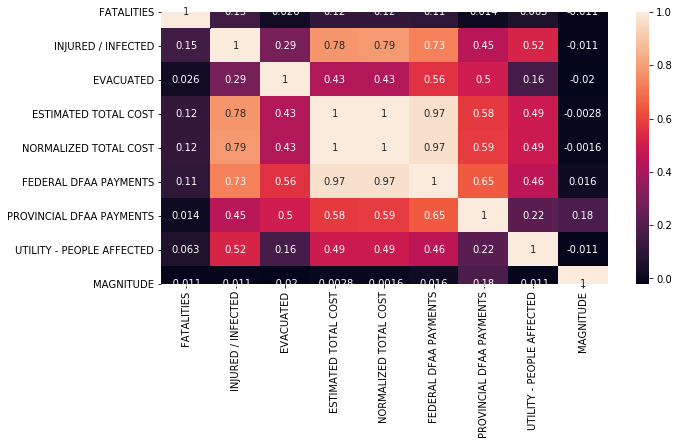

In [12]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(), annot=True)

3. Find 3 pairs of columns, one pair that is highly positively correlated, one for which the correlation is almost zero and one pair that is negatively correlated. In each case write down an explanation why we see this correlation

In [14]:
"""
Highly positively correlated: ESTIMATED TOTAL COST and FEDERAL DFAA PAYMENTS

Estimated Total Cost: all the costs listed within the financial data fields for a specific event.
FEDERAL DFAA Payments: The amount, paid out by Disaster Financial Assistance Arrangements (Public Safety Canada) due to a specific event

Explanation: the higher the amount paid out by Disaster Financial Assistance, the higher will be the total costs listed
within the financial data fields
"""

data['ESTIMATED TOTAL COST'].corr(data['FEDERAL DFAA PAYMENTS'])

0.9717290336234283

In [16]:
"""
Correlation almost zero: PROVINCIAL DFAA PAYMENTS and FATALITIES

PROVINCIAL DFAA PAYMENTS: The amount, in dollars, paid out by a Province or Territory due to a specific event.
Fatalities: The number of people killed due to a specific event

Explanation: no correlation was found between the number of fatalities and the amount paid by the Province
"""

data['PROVINCIAL DFAA PAYMENTS'].corr(data['FATALITIES'])

0.014237266410465488

In [18]:
"""
Negative correlation: EVACUATED and MAGNITUDE

Evacuated: The number of individuals evacuated by the government of Canada due to a specific event.
Magnitude: A measure of the size of an earthquake, related to the amount of energy released.

Explanation: as the size of the earthquake increases, the number of individuals evacuated decreases
"""

data['EVACUATED'].corr(data['MAGNITUDE'])

-0.020268674984314217

4. Look up the pairplot function in Seaborn. Use it to plot the pairwise relations between the six columns you selected. Does what you see confirm your ideas? Describe in a comment.

In [19]:
data_high_correlation = data[['ESTIMATED TOTAL COST', 'FEDERAL DFAA PAYMENTS',]]

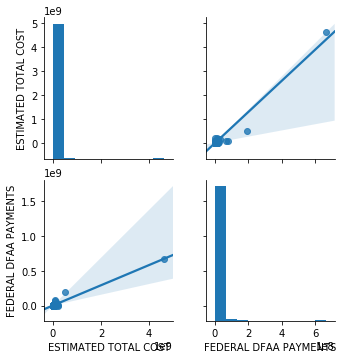

In [20]:
sns.pairplot(data_high_correlation, kind="reg")

In [21]:
data_zero_correlation = data[['PROVINCIAL DFAA PAYMENTS', 'FATALITIES',]]

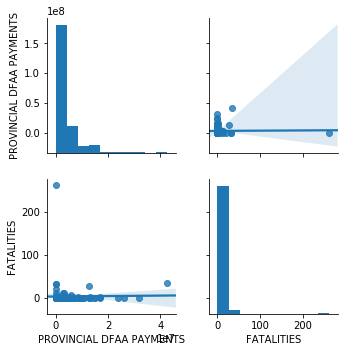

In [22]:
sns.pairplot(data_zero_correlation, kind="reg")

In [23]:
data_negative_correlation = data[['EVACUATED', 'MAGNITUDE',]]

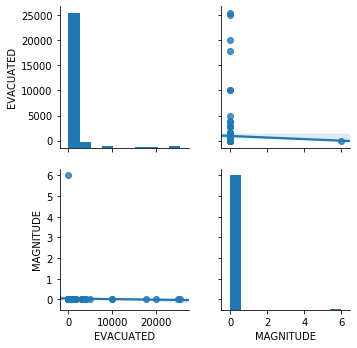

In [24]:
sns.pairplot(data_negative_correlation, kind="reg")